In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug_cons_data.txt")


In [3]:
df.isnull().sum()/len(df)*100


Age          0.0
Gender       0.0
Education    0.0
Country      0.0
Nscore       0.0
Escore       0.0
Oscore       0.0
Ascore       0.0
Cscore       0.0
Imp          0.0
SS           0.0
Alc          0.0
Amph         0.0
Amyl         0.0
Benz         0.0
Caff         0.0
Cann         0.0
Choc         0.0
Coke         0.0
Crack        0.0
Ect          0.0
Heroin       0.0
Keta         0.0
Legalh       0.0
LSD          0.0
Meth         0.0
Shrooms      0.0
Nico         0.0
Semer        0.0
VSA          0.0
dtype: float64

In [4]:
df.head()


,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Imp,...,Ect,Heroin,Keta,Legalh,LSD,Meth,Shrooms,Nico,Semer,VSA
0,35-44,Female,Diploma,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,Male,PhD,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,Male,Diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,MA,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,Female,PhD,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [5]:
df.var()



Nscore    0.996215
Escore    0.994903
Oscore    0.992471
Ascore    0.994888
Cscore    0.995051
Imp       0.910945
SS        0.928720
dtype: float64

In [6]:
#look at correlation of numeric columns
df.corr()


,Nscore,Escore,Oscore,Ascore,Cscore,Imp,SS
Nscore,1.000000,-0.431051,0.010177,-0.216964,-0.391088,0.174399,0.079988
Escore,-0.431051,1.000000,0.245277,0.157336,0.308024,0.114151,0.210130
Oscore,0.010177,0.245277,1.000000,0.038516,-0.056811,0.277512,0.421709
Ascore,-0.216964,0.157336,0.038516,1.000000,0.247482,-0.229690,-0.208061
Cscore,-0.391088,0.308024,-0.056811,0.247482,1.000000,-0.335133,-0.229038
Imp,0.174399,0.114151,0.277512,-0.229690,-0.335133,1.000000,0.623120
SS,0.079988,0.210130,0.421709,-0.208061,-0.229038,0.623120,1.000000


In [7]:
#look at correlation of numeric columns
print(df.corr())


Nscore    Escore    Oscore    Ascore    Cscore       Imp        SS
Nscore  1.000000 -0.431051  0.010177 -0.216964 -0.391088  0.174399  0.079988
Escore -0.431051  1.000000  0.245277  0.157336  0.308024  0.114151  0.210130
Oscore  0.010177  0.245277  1.000000  0.038516 -0.056811  0.277512  0.421709
Ascore -0.216964  0.157336  0.038516  1.000000  0.247482 -0.229690 -0.208061
Cscore -0.391088  0.308024 -0.056811  0.247482  1.000000 -0.335133 -0.229038
Imp     0.174399  0.114151  0.277512 -0.229690 -0.335133  1.000000  0.623120
SS      0.079988  0.210130  0.421709 -0.208061 -0.229038  0.623120  1.000000


In [8]:
#Try random forest for feature selection

from sklearn.ensemble import RandomForestRegressor

In [9]:
model = RandomForestRegressor(random_state=1, max_depth=10)

In [10]:
df2 = pd.get_dummies(df)

In [11]:
df2

,Nscore,Escore,Oscore,Ascore,Cscore,Imp,SS,Age_18-24,Age_25-34,Age_35-44,...,Semer_CL2,Semer_CL3,Semer_CL4,VSA_CL0,VSA_CL1,VSA_CL2,VSA_CL3,VSA_CL4,VSA_CL5,VSA_CL6
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,1,...,0,0,0,1,0,0,0,0,0,0
5,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,...,0,0,0,1,0,0,0,0,0,0
6,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,0,0,0,...,0,0,0,1,0,0,0,0,0,0
7,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,0,0,1,...,0,0,0,1,0,0,0,0,0,0
9,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [12]:
df.head()

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Imp,...,Ect,Heroin,Keta,Legalh,LSD,Meth,Shrooms,Nico,Semer,VSA
0,35-44,Female,Diploma,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,Male,PhD,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,Male,Diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,MA,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,Female,PhD,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [13]:
#drop attribute to predict, let's say Shrooms
df2 = df.drop(['Shrooms'], axis=1)

In [14]:
df2.head()


,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Imp,...,Crack,Ect,Heroin,Keta,Legalh,LSD,Meth,Nico,Semer,VSA
0,35-44,Female,Diploma,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,Male,PhD,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL4,CL0,CL0
2,35-44,Male,Diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
3,18-24,Female,MA,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,Female,PhD,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL0,CL0


In [15]:
df2 = pd.get_dummies(df2)
model.fit(df2, df.Shrooms)

ValueError: could not convert string to float: 'CL0'

In [16]:
df2 = pd.get_dummies(df)
model.fit(df2, df.Shrooms)

ValueError: could not convert string to float: 'CL0'

In [17]:
df2 = pd.get_dummies(df)
model.fit(df2, df2.Shrooms)

AttributeError: 'DataFrame' object has no attribute 'Shrooms'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug_cons_data.txt")


In [3]:
#Try random forest for feature selection --------------------------------------------
from sklearn.ensemble import RandomForestRegressor


In [4]:
model = RandomForestRegressor(random_state=1, max_depth=10)


In [5]:
df2 = pd.get_dummies(df)
model.fit(df2, df2.Shrooms)

AttributeError: 'DataFrame' object has no attribute 'Shrooms'

In [6]:
df2 = pd.get_dummies(df)
model.fit(df2, df2['Shrooms'])

KeyError: 'Shrooms'

In [7]:
df2 = pd.get_dummies(df)
model.fit(df2, df['Shrooms'])

ValueError: could not convert string to float: 'CL0'

In [8]:
#Try random forest for feature selection --------------------------------------------
from sklearn.ensemble import RandomForestClassifier


In [9]:
model = RandomForestClassifier(random_state=1, max_depth=10)


In [10]:
df2 = pd.get_dummies(df)
model.fit(df2, df['Shrooms'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug_cons_data.txt")


In [3]:
#Try random forest for feature selection --------------------------------------------
from sklearn.ensemble import RandomForestClassifier


In [4]:
model = RandomForestClassifier(random_state=1, max_depth=10)


In [5]:
#df2 = pd.get_dummies(df)
model.fit(df, df['Shrooms'])

ValueError: could not convert string to float: '35-44'

In [6]:
df2 = pd.get_dummies(df)
model.fit(df, df['Shrooms'])

ValueError: could not convert string to float: '35-44'

In [7]:
df2 = pd.get_dummies(df)
model.fit(df2, df2['Shrooms'])

KeyError: 'Shrooms'

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug_cons_data.txt")


In [3]:
#Try random forest for feature selection --------------------------------------------
from sklearn.ensemble import RandomForestClassifier


In [4]:
model = RandomForestClassifier(random_state=1, max_depth=10)


In [5]:
#drop attribute to predict, let's say Shrooms
df2 = df.drop(['Shrooms'], axis=1)

In [6]:
df2 = pd.get_dummies(df2)
model.fit(df2, df2['Shrooms'])

KeyError: 'Shrooms'

In [7]:
df2 = pd.get_dummies(df2)
model.fit(df2, df['Shrooms'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [8]:
features = df2.columns


In [9]:
df.head()


,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Imp,...,Ect,Heroin,Keta,Legalh,LSD,Meth,Shrooms,Nico,Semer,VSA
0,35-44,Female,Diploma,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,Male,PhD,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,Male,Diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,MA,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,Female,PhD,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [10]:
df2.head()


,Nscore,Escore,Oscore,Ascore,Cscore,Imp,SS,Age_18-24,Age_25-34,Age_35-44,...,Semer_CL2,Semer_CL3,Semer_CL4,VSA_CL0,VSA_CL1,VSA_CL2,VSA_CL3,VSA_CL4,VSA_CL5,VSA_CL6
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [11]:
df2.size


292175

In [12]:
df2.shape


(1885, 155)

In [13]:
df.shape


(1885, 30)

In [14]:
importances = model.feature_importances_


In [15]:
indices = np.argsort(importances)[-9:] #top 10 features

NameError: name 'np' is not defined

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
indices = np.argsort(importances)[-9:] #top 10 features


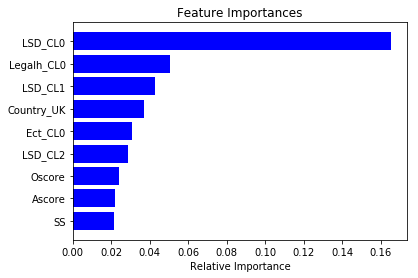

In [18]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [19]:
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-19:] #top 10 features

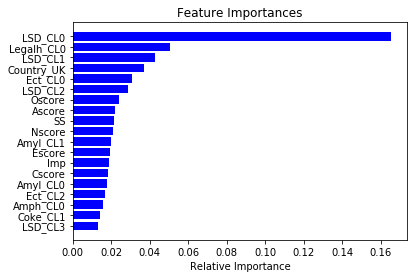

In [20]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [21]:
#drop attribute to predict, let's say Shrooms
df2 = df.drop(['Meth'], axis=1)

In [22]:
df2 = pd.get_dummies(df2)
model.fit(df2, df['Meth'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [23]:
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-19:] #top 10 features

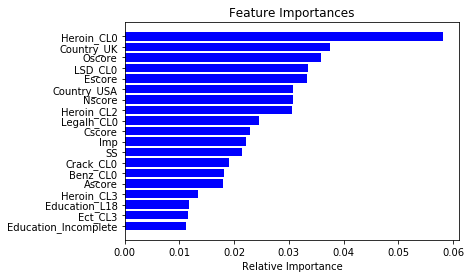

In [24]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [25]:
#drop attribute to predict, let's say Shrooms
df2 = df.drop(['Heroin'], axis=1)

In [26]:
df2 = pd.get_dummies(df2)
model.fit(df2, df['Heroin'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [27]:
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-19:] #top 10 features

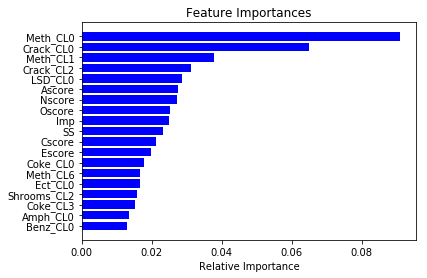

In [28]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [29]:
#drop attribute to predict, let's say Shrooms
df = df['Age','Gender','Education','Country','Nscore','Escore','Oscore','Ascore','Cscore','Imp','SS']
df2 = df.drop(['Heroin'], axis=1)

KeyError: ('Age', 'Gender', 'Education', 'Country', 'Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Imp', 'SS')

In [30]:
df

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Imp,...,Ect,Heroin,Keta,Legalh,LSD,Meth,Shrooms,Nico,Semer,VSA
0,35-44,Female,Diploma,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,Male,PhD,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,Male,Diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,MA,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,Female,PhD,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,65+,Female,L18,CA,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,45-54,Male,MA,USA,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,35-44,Male,L16,UK,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,35-44,Female,Diploma,CA,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,55-64,Male,MA,UK,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [31]:
#drop attribute to predict, let's say Shrooms
df = df[df['Age'],df['Gender'],df['Education'],df['Country'],df['Nscore'],df['Escore'],df['Oscore'],df['Ascore'],df['Cscore'],df['Imp'],df['SS']]
df2 = df.drop(['Heroin'], axis=1)

TypeError: '(0       35-44
1       25-34
2       35-44
3       18-24
4       35-44
5         65+
6       45-54
7       35-44
8       35-44
9       55-64
10      25-34
11      45-54
12      55-64
13      55-64
14      55-64
15      55-64
16      35-44
17      45-54
18      55-64
19      35-44
20      45-54
21        65+
22      45-54
23      45-54
24      55-64
25      45-54
26      55-64
27      35-44
28      35-44
29      45-54
        ...  
1855    35-44
1856    18-24
1857    18-24
1858    18-24
1859    35-44
1860    55-64
1861    25-34
1862    45-54
1863    18-24
1864    25-34
1865    18-24
1866    18-24
1867    18-24
1868    18-24
1869    18-24
1870    25-34
1871    18-24
1872    18-24
1873    18-24
1874      65+
1875    18-24
1876    25-34
1877    18-24
1878    18-24
1879    18-24
1880    18-24
1881    18-24
1882    25-34
1883    18-24
1884    18-24
Name: Age, Length: 1885, dtype: object, 0       Female
1         Male
2         Male
3       Female
4       Female
5       Female
6         Male
7         Male
8       Female
9         Male
10      Female
11        Male
12      Female
13      Female
14      Female
15        Male
16      Female
17        Male
18        Male
19        Male
20        Male
21        Male
22        Male
23        Male
24        Male
25        Male
26      Female
27        Male
28      Female
29        Male
         ...  
1855      Male
1856      Male
1857      Male
1858      Male
1859      Male
1860    Female
1861    Female
1862      Male
1863    Female
1864      Male
1865    Female
1866    Female
1867    Female
1868      Male
1869      Male
1870    Female
1871      Male
1872      Male
1873      Male
1874      Male
1875      Male
1876      Male
1877      Male
1878      Male
1879      Male
1880    Female
1881      Male
1882    Female
1883    Female
1884      Male
Name: Gender, Length: 1885, dtype: object, 0          Diploma
1              PhD
2          Diploma
3               MA
4              PhD
5              L18
6               MA
7              L16
8          Diploma
9               MA
10              UG
11      Incomplete
12              UG
13         Diploma
14         Diploma
15              UG
16      Incomplete
17             L16
18              UG
19         Diploma
20         Diploma
21            LB16
22              UG
23             L16
24              UG
25      Incomplete
26             L18
27              UG
28              MA
29             PhD
           ...    
1855       Diploma
1856    Incomplete
1857    Incomplete
1858           L18
1859    Incomplete
1860            UG
1861            UG
1862          LB16
1863    Incomplete
1864    Incomplete
1865       Diploma
1866            UG
1867    Incomplete
1868    Incomplete
1869    Incomplete
1870            UG
1871           L18
1872    Incomplete
1873           L17
1874    Incomplete
1875    Incomplete
1876    Incomplete
1877           L17
1878            UG
1879    Incomplete
1880    Incomplete
1881    Incomplete
1882            UG
1883    Incomplete
1884    Incomplete
Name: Education, Length: 1885, dtype: object, 0          UK
1          UK
2          UK
3          UK
4          UK
5          CA
6         USA
7          UK
8          CA
9          UK
10         UK
11      Other
12         UK
13         CA
14         UK
15         UK
16         UK
17         UK
18        AUS
19         UK
20         UK
21         UK
22         UK
23         UK
24         UK
25         UK
26         CA
27         UK
28         UK
29         UK
        ...  
1855    Other
1856      USA
1857      USA
1858      USA
1859    Other
1860       CA
1861      USA
1862      USA
1863      USA
1864      USA
1865      USA
1866      USA
1867      USA
1868    Other
1869      USA
1870    Other
1871      USA
1872       CA
1873      USA
1874      USA
1875      USA
1876       CA
1877      USA
1878       CA
1879    Other
1880      USA
1881      USA
1882      USA
1883      USA
1884      IRL
Name: Country, Length: 1885, dtype: object, 0       0.31287
1      -0.67825
2      -0.46725
3      -0.14882
4       0.73545
5      -0.67825
6      -0.46725
7      -1.32828
8       0.62967
9      -0.24649
10     -1.05308
11     -1.32828
12      2.28554
13     -0.79151
14     -0.92104
15     -2.05048
16     -1.55078
17      0.52135
18      1.37297
19     -0.34799
20     -0.79151
21     -1.19430
22      0.41667
23      1.60383
24     -0.14882
25     -0.79151
26     -0.05188
27      0.52135
28      0.04257
29     -1.32828
         ...   
1855   -1.19430
1856    0.31287
1857    1.72012
1858   -0.24649
1859   -0.34799
1860   -1.69163
1861   -0.34799
1862    0.73545
1863    0.62967
1864   -2.05048
1865    0.04257
1866    0.13606
1867    1.13281
1868   -0.58016
1869   -0.14882
1870   -1.05308
1871    1.02119
1872   -0.79151
1873    0.73545
1874    2.12700
1875   -0.05188
1876   -0.14882
1877    1.49158
1878   -0.05188
1879   -0.79151
1880   -1.19430
1881   -0.24649
1882    1.13281
1883    0.91093
1884   -0.46725
Name: Nscore, Length: 1885, dtype: float64, 0      -0.57545
1       1.93886
2       0.80523
3      -0.80615
4      -1.63340
5      -0.30033
6      -1.09207
7       1.93886
8       2.57309
9       0.00332
10      0.80523
11      0.00332
12      0.16767
13      0.80523
14      1.45421
15     -1.50796
16     -0.80615
17     -1.23177
18     -0.15487
19     -1.76250
20      0.80523
21      0.47617
22     -0.94779
23     -3.27393
24      0.63779
25     -0.43999
26     -1.63340
27     -1.23177
28     -1.50796
29      1.74091
         ...   
1855    1.11406
1856   -0.57545
1857    0.32197
1858    0.32197
1859    0.00332
1860   -1.09207
1861    0.00332
1862   -0.43999
1863    0.63779
1864    0.00332
1865    0.00332
1866   -0.80615
1867   -0.43999
1868   -0.15487
1869    1.11406
1870    0.96248
1871   -0.43999
1872    0.00332
1873   -1.23177
1874   -0.15487
1875   -1.76250
1876   -0.57545
1877   -1.92173
1878   -1.76250
1879    0.32197
1880    1.74091
1881    1.74091
1882   -1.37639
1883   -1.92173
1884    2.12700
Name: Escore, Length: 1885, dtype: float64, 0      -0.58331
1       1.43533
2      -0.84732
3      -0.01928
4      -0.45174
5      -1.55521
6      -0.45174
7      -0.84732
8      -0.97631
9      -1.42424
10     -1.11902
11      0.14143
12      0.44585
13     -0.01928
14      0.44585
15     -1.55521
16     -1.68062
17     -0.31776
18     -0.17779
19     -2.39883
20      0.72330
21     -1.11902
22     -0.84732
23     -1.27553
24      1.24033
25     -1.27553
26     -3.27393
27     -0.01928
28     -0.71727
29      0.88309
         ...   
1855    0.58331
1856   -0.31776
1857    1.65653
1858    0.44585
1859    0.72330
1860    1.06238
1861    1.24033
1862    0.44585
1863    2.90161
1864    2.15324
1865    2.44904
1866    1.43533
1867    0.29338
1868    0.29338
1869    1.43533
1870    1.88511
1871    1.43533
1872    2.44904
1873    0.58331
1874    2.44904
1875    0.58331
1876    1.43533
1877   -0.58331
1878    0.88309
1879    0.29338
1880    1.88511
1881    0.58331
1882   -1.27553
1883    0.29338
1884    1.65653
Name: Oscore, Length: 1885, dtype: float64, 0      -0.91699
1       0.76096
2      -1.62090
3       0.59042
4      -0.30172
5       2.03972
6      -0.30172
7      -0.30172
8       0.76096
9       0.59042
10     -0.76096
11     -1.92595
12     -1.62090
13      0.94156
14     -0.60633
15     -1.07533
16      0.28783
17     -0.45321
18     -1.92595
19     -1.92595
20      1.61108
21     -0.60633
22      1.11406
23      0.28783
24      0.76096
25      0.94156
26     -0.76096
27     -0.01729
28      0.28783
29      0.94156
         ...   
1855   -0.01729
1856   -1.47955
1857   -0.15487
1858   -0.15487
1859    0.28783
1860   -0.45321
1861   -0.15487
1862   -1.07533
1863   -1.07533
1864   -0.91699
1865   -0.60633
1866    0.28783
1867   -0.76096
1868   -1.62090
1869   -0.30172
1870    1.81866
1871   -1.07533
1872    0.76096
1873   -0.60633
1874    0.94156
1875   -0.76096
1876   -0.91699
1877   -1.77200
1878   -0.76096
1879   -0.30172
1880    0.76096
1881    0.76096
1882   -1.77200
1883   -1.62090
1884    1.11406
Name: Ascore, Length: 1885, dtype: float64, 0      -0.00665
1      -0.14277
2      -1.01450
3       0.58489
4       1.30612
5       1.63088
6       0.93949
7       1.63088
8       1.13407
9       0.12331
10      1.81175
11     -0.52745
12     -0.78155
13      3.46436
14      1.63088
15      1.13407
16      0.75830
17     -1.38502
18     -1.51840
19      0.75830
20     -1.13788
21      1.81175
22     -0.89891
23     -1.01450
24      1.46191
25     -0.00665
26      0.58489
27     -2.18109
28      1.30612
29      1.81175
         ...   
1855    0.12331
1856   -0.89891
1857   -1.78169
1858   -0.14277
1859    0.12331
1860   -0.65253
1861    0.41594
1862    0.25953
1863    0.93949
1864    0.41594
1865   -2.18109
1866    1.63088
1867   -0.14277
1868   -1.38502
1869   -0.00665
1870    1.30612
1871    0.12331
1872   -1.51840
1873   -0.40581
1874   -0.65253
1875   -0.14277
1876   -0.78155
1877    0.58489
1878    2.33337
1879   -0.27607
1880   -1.13788
1881   -1.51840
1882   -1.38502
1883   -2.57309
1884    0.41594
Name: Cscore, Length: 1885, dtype: float64, 0      -0.21712
1      -0.71126
2      -1.37983
3      -1.37983
4      -0.21712
5      -1.37983
6      -0.21712
7       0.19268
8      -1.37983
9      -1.37983
10      0.19268
11      0.52975
12      1.29221
13     -0.71126
14      1.29221
15     -0.71126
16     -0.21712
17     -1.37983
18     -0.71126
19     -1.37983
20      0.19268
21     -0.21712
22     -0.71126
23     -1.37983
24     -0.21712
25     -0.21712
26      0.19268
27      1.86203
28      0.19268
29     -0.21712
         ...   
1855   -0.71126
1856   -1.37983
1857    2.90161
1858    0.88113
1859   -0.21712
1860   -0.71126
1861    0.88113
1862    0.52975
1863    0.88113
1864   -0.21712
1865    0.88113
1866   -0.71126
1867    1.86203
1868    0.19268
1869    0.19268
1870   -0.71126
1871   -0.71126
1872    0.88113
1873    0.52975
1874   -0.21712
1875    1.29221
1876    0.52975
1877   -0.21712
1878   -0.71126
1879    0.88113
1880    0.88113
1881    0.88113
1882    0.52975
1883    1.29221
1884    0.88113
Name: Imp, Length: 1885, dtype: float64, 0      -1.18084
1      -0.21575
2       0.40148
3      -1.18084
4      -0.21575
5      -1.54858
6       0.07987
7      -0.52593
8      -1.54858
9      -0.84637
10      0.07987
11      1.22470
12      0.07987
13     -0.84637
14      0.76540
15     -0.52593
16     -2.07848
17     -0.84637
18     -0.21575
19     -2.07848
20     -0.21575
21     -1.18084
22      0.07987
23     -1.54858
24     -0.52593
25      0.40148
26     -1.54858
27      0.40148
28     -0.52593
29     -0.52593
         ...   
1855    0.40148
1856    0.76540
1857    0.40148
1858    1.22470
1859    0.76540
1860    0.07987
1861    0.40148
1862    0.40148
1863    1.22470
1864    0.40148
1865    1.22470
1866   -0.21575
1867   -0.21575
1868    0.40148
1869    0.76540
1870    0.07987
1871    0.40148
1872    1.92173
1873    0.40148
1874    0.07987
1875    1.22470
1876    0.40148
1877    1.22470
1878   -0.21575
1879    0.76540
1880    1.92173
1881    0.76540
1882   -0.52593
1883    1.22470
1884    1.22470
Name: SS, Length: 1885, dtype: float64)' is an invalid key

In [32]:
#drop attribute to predict, let's say Shrooms
df = pd.DataFrame([df['Age'],df['Gender'],df['Education'],df['Country'],df['Nscore'],df['Escore'],df['Oscore'],df['Ascore'],df['Cscore'],df['Imp'],df['SS']])
df2 = df.drop(['Heroin'], axis=1)

KeyError: "['Heroin'] not found in axis"

In [33]:
#drop attribute to predict, let's say Shrooms
df = pd.DataFrame([df['Age'],df['Gender'],df['Education'],df['Country'],df['Nscore'],df['Escore'],df['Oscore'],df['Ascore'],df['Cscore'],df['Imp'],df['SS']])
#df2 = df.drop(['Heroin'], axis=1)

KeyError: 'Age'

In [34]:
df['Age']

KeyError: 'Age'

In [35]:
df

,0,1,2,3,4,5,6,7,8,9,...,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884
Age,35-44,25-34,35-44,18-24,35-44,65+,45-54,35-44,35-44,55-64,...,18-24,25-34,18-24,18-24,18-24,18-24,18-24,25-34,18-24,18-24
Gender,Female,Male,Male,Female,Female,Female,Male,Male,Female,Male,...,Male,Male,Male,Male,Male,Female,Male,Female,Female,Male
Education,Diploma,PhD,Diploma,MA,PhD,L18,MA,L16,Diploma,MA,...,Incomplete,Incomplete,L17,UG,Incomplete,Incomplete,Incomplete,UG,Incomplete,Incomplete
Country,UK,UK,UK,UK,UK,CA,USA,UK,CA,UK,...,USA,CA,USA,CA,Other,USA,USA,USA,USA,IRL
Nscore,0.31287,-0.67825,-0.46725,-0.14882,0.73545,-0.67825,-0.46725,-1.32828,0.62967,-0.24649,...,-0.05188,-0.14882,1.49158,-0.05188,-0.79151,-1.1943,-0.24649,1.13281,0.91093,-0.46725
Escore,-0.57545,1.93886,0.80523,-0.80615,-1.6334,-0.30033,-1.09207,1.93886,2.57309,0.00332,...,-1.7625,-0.57545,-1.92173,-1.7625,0.32197,1.74091,1.74091,-1.37639,-1.92173,2.127
Oscore,-0.58331,1.43533,-0.84732,-0.01928,-0.45174,-1.55521,-0.45174,-0.84732,-0.97631,-1.42424,...,0.58331,1.43533,-0.58331,0.88309,0.29338,1.88511,0.58331,-1.27553,0.29338,1.65653
Ascore,-0.91699,0.76096,-1.6209,0.59042,-0.30172,2.03972,-0.30172,-0.30172,0.76096,0.59042,...,-0.76096,-0.91699,-1.772,-0.76096,-0.30172,0.76096,0.76096,-1.772,-1.6209,1.11406
Cscore,-0.00665,-0.14277,-1.0145,0.58489,1.30612,1.63088,0.93949,1.63088,1.13407,0.12331,...,-0.14277,-0.78155,0.58489,2.33337,-0.27607,-1.13788,-1.5184,-1.38502,-2.57309,0.41594
Imp,-0.21712,-0.71126,-1.37983,-1.37983,-0.21712,-1.37983,-0.21712,0.19268,-1.37983,-1.37983,...,1.29221,0.52975,-0.21712,-0.71126,0.88113,0.88113,0.88113,0.52975,1.29221,0.88113


In [36]:
#drop attribute to predict, let's say Shrooms
df = pd.DataFrame([df['Age'],df['Gender'],df['Education'],df['Country'],
                   df['Nscore'],df['Escore'],df['Oscore'],df['Ascore'],
                   df['Cscore'],df['Imp'],df['SS']], axis=1)
#df2 = df.drop(['Heroin'], axis=1)

KeyError: 'Age'

In [37]:
df = pd.read_csv("drug_cons_data.txt")


In [38]:
#drop attribute to predict, let's say Shrooms
attrs = pd.DataFrame([df['Age'],df['Gender'],df['Education'],df['Country'],
                   df['Nscore'],df['Escore'],df['Oscore'],df['Ascore'],
                   df['Cscore'],df['Imp'],df['SS']], axis=1)
#df2 = df.drop(['Heroin'], axis=1)

TypeError: __init__() got an unexpected keyword argument 'axis'

In [39]:
#drop attribute to predict, let's say Shrooms
attrs = pd.DataFrame([df['Age'],df['Gender'],df['Education'],df['Country'],
                   df['Nscore'],df['Escore'],df['Oscore'],df['Ascore'],
                   df['Cscore'],df['Imp'],df['SS']])
#df2 = df.drop(['Heroin'], axis=1)

In [40]:
attrs


,0,1,2,3,4,5,6,7,8,9,...,1875,1876,1877,1878,1879,1880,1881,1882,1883,1884
Age,35-44,25-34,35-44,18-24,35-44,65+,45-54,35-44,35-44,55-64,...,18-24,25-34,18-24,18-24,18-24,18-24,18-24,25-34,18-24,18-24
Gender,Female,Male,Male,Female,Female,Female,Male,Male,Female,Male,...,Male,Male,Male,Male,Male,Female,Male,Female,Female,Male
Education,Diploma,PhD,Diploma,MA,PhD,L18,MA,L16,Diploma,MA,...,Incomplete,Incomplete,L17,UG,Incomplete,Incomplete,Incomplete,UG,Incomplete,Incomplete
Country,UK,UK,UK,UK,UK,CA,USA,UK,CA,UK,...,USA,CA,USA,CA,Other,USA,USA,USA,USA,IRL
Nscore,0.31287,-0.67825,-0.46725,-0.14882,0.73545,-0.67825,-0.46725,-1.32828,0.62967,-0.24649,...,-0.05188,-0.14882,1.49158,-0.05188,-0.79151,-1.1943,-0.24649,1.13281,0.91093,-0.46725
Escore,-0.57545,1.93886,0.80523,-0.80615,-1.6334,-0.30033,-1.09207,1.93886,2.57309,0.00332,...,-1.7625,-0.57545,-1.92173,-1.7625,0.32197,1.74091,1.74091,-1.37639,-1.92173,2.127
Oscore,-0.58331,1.43533,-0.84732,-0.01928,-0.45174,-1.55521,-0.45174,-0.84732,-0.97631,-1.42424,...,0.58331,1.43533,-0.58331,0.88309,0.29338,1.88511,0.58331,-1.27553,0.29338,1.65653
Ascore,-0.91699,0.76096,-1.6209,0.59042,-0.30172,2.03972,-0.30172,-0.30172,0.76096,0.59042,...,-0.76096,-0.91699,-1.772,-0.76096,-0.30172,0.76096,0.76096,-1.772,-1.6209,1.11406
Cscore,-0.00665,-0.14277,-1.0145,0.58489,1.30612,1.63088,0.93949,1.63088,1.13407,0.12331,...,-0.14277,-0.78155,0.58489,2.33337,-0.27607,-1.13788,-1.5184,-1.38502,-2.57309,0.41594
Imp,-0.21712,-0.71126,-1.37983,-1.37983,-0.21712,-1.37983,-0.21712,0.19268,-1.37983,-1.37983,...,1.29221,0.52975,-0.21712,-0.71126,0.88113,0.88113,0.88113,0.52975,1.29221,0.88113


In [41]:
#drop attribute to predict, let's say Shrooms
attrs = df[['Age','Gender','Education','Country','Nscore','Escore','Oscore',
           'Ascore','Cscore','Imp','SS']].copy()
#df2 = df.drop(['Heroin'], axis=1)

In [42]:
attrs


,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Imp,SS
0,35-44,Female,Diploma,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084
1,25-34,Male,PhD,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575
2,35-44,Male,Diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148
3,18-24,Female,MA,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084
4,35-44,Female,PhD,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575
5,65+,Female,L18,CA,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858
6,45-54,Male,MA,USA,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987
7,35-44,Male,L16,UK,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593
8,35-44,Female,Diploma,CA,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858
9,55-64,Male,MA,UK,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637


In [43]:
df2 = pd.get_dummies(attrs)
model.fit(df2, df['Heroin'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [44]:
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-19:] #top 10 features

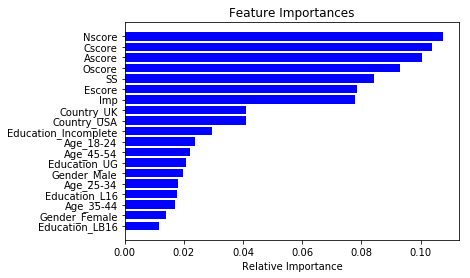

In [45]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [46]:
df2 = pd.get_dummies(attrs)
model.fit(df2, df['Shrooms'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [47]:
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-19:] #top 10 features

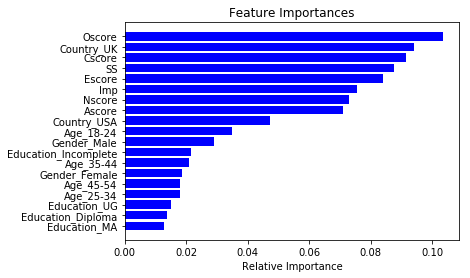

In [48]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [49]:
df2 = pd.get_dummies(attrs)
model.fit(df2, df['Meth'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [50]:
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-19:] #top 10 features

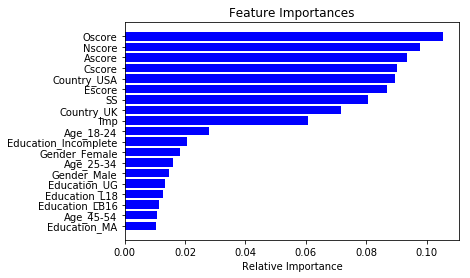

In [51]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [52]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']


In [53]:
indices


array([21, 10, 20, 19, 23, 14,  8, 13, 16,  7,  5, 29,  6,  1, 30,  4,  3,
        0,  2], dtype=int64)

In [54]:
features[21]


'Education_MA'

In [55]:
features[2]


'Oscore'

In [56]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']
df2 = pd.get_dummies(attrs)

importance_counts = {'Age':0,'Gender':0,'Education':0,'Country':0,'Nscore':0,
                     'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,'SS':0}


In [57]:
indices


array([21, 10, 20, 19, 23, 14,  8, 13, 16,  7,  5, 29,  6,  1, 30,  4,  3,
        0,  2], dtype=int64)

In [58]:
features


Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Imp', 'SS',
       'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_65+', 'Gender_Female', 'Gender_Male', 'Education_Diploma',
       'Education_Incomplete', 'Education_L16', 'Education_L17',
       'Education_L18', 'Education_LB16', 'Education_MA', 'Education_PhD',
       'Education_UG', 'Country_AUS', 'Country_CA', 'Country_IRL',
       'Country_NZ', 'Country_Other', 'Country_UK', 'Country_USA'],
      dtype='object')

In [59]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']
df2 = pd.get_dummies(attrs)

importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [60]:
importance_counts = {'Nscore':0, 'Escore':0}

In [61]:
importance_counts['Nscore'] = importance_counts['Nscore']+1

In [62]:
importance_counts

{'Nscore': 1, 'Escore': 0}

In [63]:
for drug in drugs:
    model.fit(df2, df[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-9:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1
        

KeyError: 'Country_UK'

In [64]:
df2


,Nscore,Escore,Oscore,Ascore,Cscore,Imp,SS,Age_18-24,Age_25-34,Age_35-44,...,Education_MA,Education_PhD,Education_UG,Country_AUS,Country_CA,Country_IRL,Country_NZ,Country_Other,Country_UK,Country_USA
0,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,1,0,0,...,1,0,0,0,0,0,0,0,1,0
4,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,0,0,1,...,0,1,0,0,0,0,0,0,1,0
5,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,0,0,0,...,1,0,0,0,0,0,0,0,0,1
7,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,0,0,1,...,0,0,0,0,0,0,0,0,1,0
8,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,0,0,1,...,0,0,0,0,1,0,0,0,0,0
9,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,0,0,0,...,1,0,0,0,0,0,0,0,1,0


In [65]:
df2.columns


Index(['Nscore', 'Escore', 'Oscore', 'Ascore', 'Cscore', 'Imp', 'SS',
       'Age_18-24', 'Age_25-34', 'Age_35-44', 'Age_45-54', 'Age_55-64',
       'Age_65+', 'Gender_Female', 'Gender_Male', 'Education_Diploma',
       'Education_Incomplete', 'Education_L16', 'Education_L17',
       'Education_L18', 'Education_LB16', 'Education_MA', 'Education_PhD',
       'Education_UG', 'Country_AUS', 'Country_CA', 'Country_IRL',
       'Country_NZ', 'Country_Other', 'Country_UK', 'Country_USA'],
      dtype='object')

In [66]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']
df2 = pd.get_dummies(attrs)

importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("drug_cons_data.txt")


In [3]:
#Try random forest for feature selection --------------------------------------------
from sklearn.ensemble import RandomForestClassifier


In [4]:
df

,Age,Gender,Education,Country,Nscore,Escore,Oscore,Ascore,Cscore,Imp,...,Ect,Heroin,Keta,Legalh,LSD,Meth,Shrooms,Nico,Semer,VSA
0,35-44,Female,Diploma,UK,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,25-34,Male,PhD,UK,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,35-44,Male,Diploma,UK,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,18-24,Female,MA,UK,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,35-44,Female,PhD,UK,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,65+,Female,L18,CA,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,45-54,Male,MA,USA,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,35-44,Male,L16,UK,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,35-44,Female,Diploma,CA,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,55-64,Male,MA,UK,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


In [5]:
model = RandomForestClassifier(random_state=1, max_depth=10)


In [6]:
#drop attribute to predict, let's say Shrooms
attrs = df[['Age','Gender','Education','Country','Nscore','Escore','Oscore',
           'Ascore','Cscore','Imp','SS']].copy()

In [7]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']
df2 = pd.get_dummies(attrs)

importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [8]:
for drug in drugs:
    model.fit(df2, df[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-9:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1
        

In [9]:
importance_counts        
        
        

{'Nscore': 19,
 'Escore': 19,
 'Oscore': 19,
 'Ascore': 19,
 'Cscore': 19,
 'Imp': 19,
 'SS': 19,
 'Age_18-24': 11,
 'Age_25-34': 1,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Gender_Female': 1,
 'Gender_Male': 2,
 'Education_Diploma': 0,
 'Education_Incomplete': 0,
 'Education_L16': 1,
 'Education_L17': 1,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Education_UG': 0,
 'Country_AUS': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0,
 'Country_Other': 0,
 'Country_UK': 16,
 'Country_USA': 5}

In [10]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']
df2 = pd.get_dummies(attrs)

importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}
count = 0

In [11]:
for drug in drugs:
    model.fit(df2, df[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-9:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1
        count = count+1

In [12]:
importance_counts        
        
        

{'Nscore': 19,
 'Escore': 19,
 'Oscore': 19,
 'Ascore': 19,
 'Cscore': 19,
 'Imp': 19,
 'SS': 19,
 'Age_18-24': 11,
 'Age_25-34': 1,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Gender_Female': 1,
 'Gender_Male': 2,
 'Education_Diploma': 0,
 'Education_Incomplete': 0,
 'Education_L16': 1,
 'Education_L17': 1,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Education_UG': 0,
 'Country_AUS': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0,
 'Country_Other': 0,
 'Country_UK': 16,
 'Country_USA': 5}

In [13]:
count
        

171

In [14]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']
df2 = pd.get_dummies(attrs)

importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}
count = 0

In [15]:
for drug in drugs:
    model.fit(df2, df[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-9:] #top 10 features
    print(len(indices))
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1
        count = count+1

9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


In [16]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']
df2 = pd.get_dummies(attrs)

importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}
count = 0

In [17]:
for drug in drugs:
    model.fit(df2, df[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:] #top 10 features
    print(len(indices))
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1
        count = count+1

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


In [18]:
importance_counts        

{'Nscore': 19,
 'Escore': 19,
 'Oscore': 19,
 'Ascore': 19,
 'Cscore': 19,
 'Imp': 19,
 'SS': 19,
 'Age_18-24': 15,
 'Age_25-34': 1,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Gender_Female': 2,
 'Gender_Male': 2,
 'Education_Diploma': 0,
 'Education_Incomplete': 1,
 'Education_L16': 1,
 'Education_L17': 1,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Education_UG': 2,
 'Country_AUS': 1,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0,
 'Country_Other': 1,
 'Country_UK': 16,
 'Country_USA': 14}

In [19]:
count
        

190

In [20]:
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1])}        

{'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Education_Diploma': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0,
 'Age_25-34': 1,
 'Education_Incomplete': 1,
 'Education_L16': 1,
 'Education_L17': 1,
 'Country_AUS': 1,
 'Country_Other': 1,
 'Gender_Female': 2,
 'Gender_Male': 2,
 'Education_UG': 2,
 'Country_USA': 14,
 'Age_18-24': 15,
 'Country_UK': 16,
 'Nscore': 19,
 'Escore': 19,
 'Oscore': 19,
 'Ascore': 19,
 'Cscore': 19,
 'Imp': 19,
 'SS': 19}

In [21]:
sorted(importance_counts, key=importance_counts.get, reverse=True)
        

['Nscore',
 'Escore',
 'Oscore',
 'Ascore',
 'Cscore',
 'Imp',
 'SS',
 'Country_UK',
 'Age_18-24',
 'Country_USA',
 'Gender_Female',
 'Gender_Male',
 'Education_UG',
 'Age_25-34',
 'Education_Incomplete',
 'Education_L16',
 'Education_L17',
 'Country_AUS',
 'Country_Other',
 'Age_35-44',
 'Age_45-54',
 'Age_55-64',
 'Age_65+',
 'Education_Diploma',
 'Education_L18',
 'Education_LB16',
 'Education_MA',
 'Education_PhD',
 'Country_CA',
 'Country_IRL',
 'Country_NZ']

In [22]:
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        

{'Nscore': 19,
 'Escore': 19,
 'Oscore': 19,
 'Ascore': 19,
 'Cscore': 19,
 'Imp': 19,
 'SS': 19,
 'Country_UK': 16,
 'Age_18-24': 15,
 'Country_USA': 14,
 'Gender_Female': 2,
 'Gender_Male': 2,
 'Education_UG': 2,
 'Age_25-34': 1,
 'Education_Incomplete': 1,
 'Education_L16': 1,
 'Education_L17': 1,
 'Country_AUS': 1,
 'Country_Other': 1,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Education_Diploma': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0}

In [23]:
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']
df2 = pd.get_dummies(attrs)

importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [24]:
for drug in drugs:
    model.fit(df2, df[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-5:] #top 10 features
    print(len(indices))
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1


5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5


In [25]:
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        

        

{'Oscore': 19,
 'Cscore': 19,
 'Nscore': 15,
 'Ascore': 15,
 'Escore': 12,
 'SS': 11,
 'Country_UK': 2,
 'Age_18-24': 1,
 'Country_USA': 1,
 'Imp': 0,
 'Age_25-34': 0,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Gender_Female': 0,
 'Gender_Male': 0,
 'Education_Diploma': 0,
 'Education_Incomplete': 0,
 'Education_L16': 0,
 'Education_L17': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Education_UG': 0,
 'Country_AUS': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0,
 'Country_Other': 0}

In [26]:
#look at correlation of numeric columns
print(df.corr())


Nscore    Escore    Oscore    Ascore    Cscore       Imp        SS
Nscore  1.000000 -0.431051  0.010177 -0.216964 -0.391088  0.174399  0.079988
Escore -0.431051  1.000000  0.245277  0.157336  0.308024  0.114151  0.210130
Oscore  0.010177  0.245277  1.000000  0.038516 -0.056811  0.277512  0.421709
Ascore -0.216964  0.157336  0.038516  1.000000  0.247482 -0.229690 -0.208061
Cscore -0.391088  0.308024 -0.056811  0.247482  1.000000 -0.335133 -0.229038
Imp     0.174399  0.114151  0.277512 -0.229690 -0.335133  1.000000  0.623120
SS      0.079988  0.210130  0.421709 -0.208061 -0.229038  0.623120  1.000000


In [27]:
#create dictionary that keeps track of how many times an attribute is in the top x important features
importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [28]:
#for each drug, create a random forest model that ranks features importances
#increment importance_counts for features that are in the top 10 for importance
for drug in drugs:
    model.fit(df2, all_data[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:] #top 10 features
    print(len(indices))
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1

#Show dictionary, ordered by the counts (higher count = higher importance)
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        


NameError: name 'all_data' is not defined

In [29]:
all_data = pd.read_csv("drug_cons_data.txt")


In [30]:
#Try random forest for feature selection --------------------------------------------
model = RandomForestClassifier(random_state=1, max_depth=10)

#only use demographics and personality scores to predict
attrs = all_data[['Age','Gender','Education','Country','Nscore','Escore','Oscore',
           'Ascore','Cscore','Imp','SS']].copy()

#create list of all drug names
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']

In [31]:
#convert categorical columns into dummy/indicator variables
df2 = pd.get_dummies(attrs)

In [32]:
#create dictionary that keeps track of how many times an attribute is in the top x important features
importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [33]:
#for each drug, create a random forest model that ranks features importances
#increment importance_counts for features that are in the top 10 for importance
for drug in drugs:
    model.fit(df2, all_data[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:] #top 10 features
    print(len(indices))
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1

#Show dictionary, ordered by the counts (higher count = higher importance)
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        


10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


{'Nscore': 19,
 'Escore': 19,
 'Oscore': 19,
 'Ascore': 19,
 'Cscore': 19,
 'Imp': 19,
 'SS': 19,
 'Country_UK': 16,
 'Age_18-24': 15,
 'Country_USA': 14,
 'Gender_Female': 2,
 'Gender_Male': 2,
 'Education_UG': 2,
 'Age_25-34': 1,
 'Education_Incomplete': 1,
 'Education_L16': 1,
 'Education_L17': 1,
 'Country_AUS': 1,
 'Country_Other': 1,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Education_Diploma': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0}

In [34]:
#do the same thing but this time only incrementing if in the top 5 for importance
for drug in drugs:
    model.fit(df2, all_data[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-5:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1

#Show dictionary, ordered by the counts (higher count = higher importance)
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        

        
        

{'Oscore': 38,
 'Cscore': 38,
 'Nscore': 34,
 'Ascore': 34,
 'Escore': 31,
 'SS': 30,
 'Imp': 19,
 'Country_UK': 18,
 'Age_18-24': 16,
 'Country_USA': 15,
 'Gender_Female': 2,
 'Gender_Male': 2,
 'Education_UG': 2,
 'Age_25-34': 1,
 'Education_Incomplete': 1,
 'Education_L16': 1,
 'Education_L17': 1,
 'Country_AUS': 1,
 'Country_Other': 1,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Education_Diploma': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0}

In [35]:
#create dictionary that keeps track of how many times an attribute is in the top x important features
importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [36]:
#reset importance_counts to 0 for all 
importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}
#do the same thing but this time only incrementing if in the top 5 for importance
for drug in drugs:
    model.fit(df2, all_data[drug])
    features = df2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-5:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1

#Show dictionary, ordered by the counts (higher count = higher importance)
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        

        
        

{'Oscore': 19,
 'Cscore': 19,
 'Nscore': 15,
 'Ascore': 15,
 'Escore': 12,
 'SS': 11,
 'Country_UK': 2,
 'Age_18-24': 1,
 'Country_USA': 1,
 'Imp': 0,
 'Age_25-34': 0,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Gender_Female': 0,
 'Gender_Male': 0,
 'Education_Diploma': 0,
 'Education_Incomplete': 0,
 'Education_L16': 0,
 'Education_L17': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Education_UG': 0,
 'Country_AUS': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0,
 'Country_Other': 0}

In [37]:
#example of graphing top 20 feature importances for heroin
model.fit(df2, all_data['Heroin'])
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-9:] #top 10 features

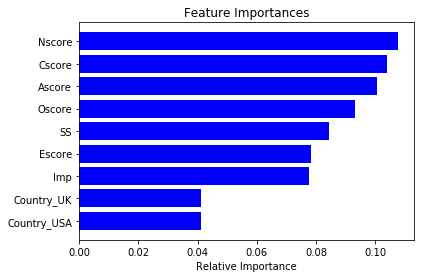

In [38]:
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()




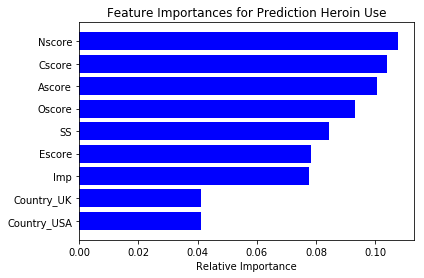

In [39]:
plt.title('Feature Importances for Prediction Heroin Use')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [40]:
#example of graphing top 20 feature importances for heroin
model.fit(df2, all_data['Heroin'])
features = df2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:] #top 10 features

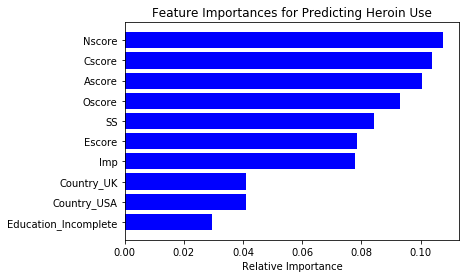

In [41]:
plt.title('Feature Importances for Predicting Heroin Use')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
all_data = pd.read_csv("drug_cons_data.txt")


In [3]:
#Look at variations and correlations of numeric columns
print(all_data.var())
print(all_data.corr())


Nscore    0.996215
Escore    0.994903
Oscore    0.992471
Ascore    0.994888
Cscore    0.995051
Imp       0.910945
SS        0.928720
dtype: float64
          Nscore    Escore    Oscore    Ascore    Cscore       Imp        SS
Nscore  1.000000 -0.431051  0.010177 -0.216964 -0.391088  0.174399  0.079988
Escore -0.431051  1.000000  0.245277  0.157336  0.308024  0.114151  0.210130
Oscore  0.010177  0.245277  1.000000  0.038516 -0.056811  0.277512  0.421709
Ascore -0.216964  0.157336  0.038516  1.000000  0.247482 -0.229690 -0.208061
Cscore -0.391088  0.308024 -0.056811  0.247482  1.000000 -0.335133 -0.229038
Imp     0.174399  0.114151  0.277512 -0.229690 -0.335133  1.000000  0.623120
SS      0.079988  0.210130  0.421709 -0.208061 -0.229038  0.623120  1.000000


In [4]:
#Try random forest for feature selection --------------------------------------------
model = RandomForestClassifier(random_state=1, max_depth=10)

#only use demographics and personality scores to predict
attrs = all_data[['Age','Gender','Education','Country','Nscore','Escore','Oscore',
           'Ascore','Cscore','Imp','SS']].copy()

#create list of all drug names
drugs = ['Alc','Amph','Amyl','Benz','Caff','Cann','Choc','Coke','Crack','Ect',
         'Heroin','Keta','Legalh','LSD','Meth','Shrooms','Nico','Semer','VSA']

In [5]:
#convert categorical columns into dummy/indicator variables
attrs2 = pd.get_dummies(attrs)

In [6]:
#create dictionary that keeps track of how many times an attribute is in the top x important features
importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}


In [7]:
#for each drug, create a random forest model that ranks features importances
#increment importance_counts for features that are in the top 10 for importance
for drug in drugs:
    model.fit(attrs2, all_data[drug])
    features = attrs2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-10:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1

#Show dictionary, ordered by the counts (higher count = higher importance)
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        


{'Nscore': 19,
 'Escore': 19,
 'Oscore': 19,
 'Ascore': 19,
 'Cscore': 19,
 'Imp': 19,
 'SS': 19,
 'Country_UK': 16,
 'Age_18-24': 15,
 'Country_USA': 14,
 'Gender_Female': 2,
 'Gender_Male': 2,
 'Education_UG': 2,
 'Age_25-34': 1,
 'Education_Incomplete': 1,
 'Education_L16': 1,
 'Education_L17': 1,
 'Country_AUS': 1,
 'Country_Other': 1,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Education_Diploma': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0}

In [9]:
#reset importance_counts to 0 for all 
importance_counts = {'Nscore':0, 'Escore':0,'Oscore':0,'Ascore':0,'Cscore':0,'Imp':0,
                     'SS':0, 'Age_18-24':0, 'Age_25-34':0, 'Age_35-44':0, 'Age_45-54':0,
                     'Age_55-64':0, 'Age_65+':0, 'Gender_Female':0, 'Gender_Male':0,
                     'Education_Diploma':0, 'Education_Incomplete':0, 'Education_L16':0, 
                     'Education_L17':0, 'Education_L18':0, 'Education_LB16':0, 
                     'Education_MA':0, 'Education_PhD':0, 'Education_UG':0, 
                     'Country_AUS':0, 'Country_CA':0, 'Country_IRL':0, 'Country_NZ':0,
                     'Country_Other':0, 'Country_UK':0, 'Country_USA':0}
#do the same thing but this time only incrementing if in the top 5 for importance
for drug in drugs:
    model.fit(attrs2, all_data[drug])
    features = attrs2.columns
    importances = model.feature_importances_
    indices = np.argsort(importances)[-5:] #top 10 features
    for i in indices:
        importance_counts[features[i]] = importance_counts[features[i]] + 1

#Show dictionary, ordered by the counts (higher count = higher importance)
{k: v for k, v in sorted(importance_counts.items(), key=lambda item: item[1], reverse=True)}        

        
        

{'Oscore': 19,
 'Cscore': 19,
 'Nscore': 15,
 'Ascore': 15,
 'Escore': 12,
 'SS': 11,
 'Country_UK': 2,
 'Age_18-24': 1,
 'Country_USA': 1,
 'Imp': 0,
 'Age_25-34': 0,
 'Age_35-44': 0,
 'Age_45-54': 0,
 'Age_55-64': 0,
 'Age_65+': 0,
 'Gender_Female': 0,
 'Gender_Male': 0,
 'Education_Diploma': 0,
 'Education_Incomplete': 0,
 'Education_L16': 0,
 'Education_L17': 0,
 'Education_L18': 0,
 'Education_LB16': 0,
 'Education_MA': 0,
 'Education_PhD': 0,
 'Education_UG': 0,
 'Country_AUS': 0,
 'Country_CA': 0,
 'Country_IRL': 0,
 'Country_NZ': 0,
 'Country_Other': 0}

In [10]:
#example of graphing top 20 feature importances for heroin
model.fit(attrs2, all_data['Heroin'])
features = attrs2.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:] #top 10 features

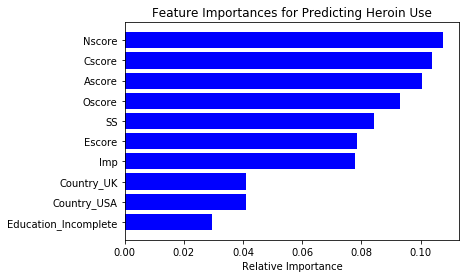

In [11]:
plt.title('Feature Importances for Predicting Heroin Use')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)),[features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
